<a href="https://colab.research.google.com/github/juhumkwon/DeepLearning/blob/main/Policy_gradient.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

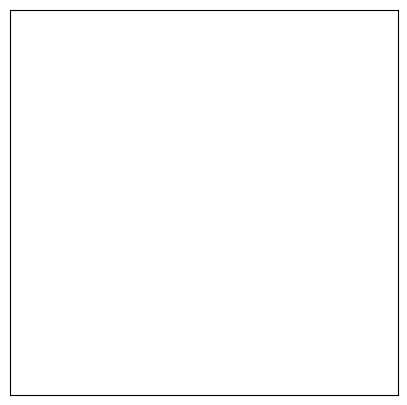

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import animation
from IPython.display import HTML

# 환경 설정
GRID_SIZE = 5
GOAL = (4, 4)
ACTIONS = [(0,1), (1,0), (0,-1), (-1,0)]  # 우, 하, 좌, 상
policy = np.ones((GRID_SIZE, GRID_SIZE, len(ACTIONS))) / len(ACTIONS)

def get_reward(state):
    return 1.0 if state == GOAL else 0.0

def step(state, action_idx):
    move = ACTIONS[action_idx]
    next_state = (max(0, min(GRID_SIZE-1, state[0]+move[0])),
                  max(0, min(GRID_SIZE-1, state[1]+move[1])))
    return next_state, get_reward(next_state)

def choose_action(state):
    probs = policy[state[0], state[1]]
    return np.random.choice(len(ACTIONS), p=probs)

# 한 에피소드 학습
def train_one_episode(alpha=0.1):
    state = (0, 0)
    trajectory = []
    while True:
        action = choose_action(state)
        next_state, reward = step(state, action)
        trajectory.append((state, action, reward))
        state = next_state
        if state == GOAL:
            break

    # 리턴 계산
    returns = []
    G = 0
    for (_, _, r) in reversed(trajectory):
        G += r
        returns.insert(0, G)

    # 정책 업데이트
    for t, (s, a, r) in enumerate(trajectory):
        probs = policy[s[0], s[1]]
        grad_log = -probs
        grad_log[a] += 1
        policy[s[0], s[1]] += alpha * grad_log * returns[t]
        policy[s[0], s[1]] = np.clip(policy[s[0], s[1]], 1e-6, None)
        policy[s[0], s[1]] /= np.sum(policy[s[0], s[1]])

# 애니메이션 설정
fig, ax = plt.subplots(figsize=(5, 5))
arrows = ['→','↓','←','↑']

def init():
    ax.clear()
    ax.set_xticks([])
    ax.set_yticks([])
    ax.set_xlim(-0.5, GRID_SIZE-0.5)
    ax.set_ylim(-0.5, GRID_SIZE-0.5)
    ax.invert_yaxis()
    return []

def update(frame):
    train_one_episode()
    ax.clear()
    ax.set_title(f"Episode {frame+1}")
    ax.set_xticks([])
    ax.set_yticks([])
    ax.set_xlim(-0.5, GRID_SIZE-0.5)
    ax.set_ylim(-0.5, GRID_SIZE-0.5)
    ax.invert_yaxis()
    for x in range(GRID_SIZE):
        for y in range(GRID_SIZE):
            if (x, y) == GOAL:
                ax.text(y, x, 'G', ha='center', va='center', fontsize=14, color='red')
            else:
                best_a = np.argmax(policy[x, y])
                ax.text(y, x, arrows[best_a], ha='center', va='center', fontsize=12)
    return []

ani = animation.FuncAnimation(fig, update, frames=50, init_func=init, blit=False, interval=200)

# Colab에서 애니메이션 표시
HTML(ani.to_jshtml())